## Gather data

In [4]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'

h0_vari = np.array([])
n_sigma = np.array([])
lcs = []
relations = []
for relation, relation_name in zip(['LX-T', 'YSZ-T', 'M-T'], 
                                   ['$L_\\mathrm{{X}}-T$',
                                    '$Y_\\mathrm{{SZ}}-T$',
                                    '$M_\\mathrm{{gas}}-T$']):
    delta_list = []
    delta_err_low_list = []
    for lc in range(1728):
        lc00 = f'{lc:04d}'

        filename = f'{data_dir}/lc{lc00}/h0_mcmc.csv'

        if os.path.exists(filename):
            # read the data
            df = pd.read_csv(filename)
            
            # get the delta H0 and its error
            delta = df[df['scaling_relation']==relation]['delta'].values[0]
            delta_err_low = df[df['scaling_relation']==relation]['delta_err_lower'].values[0]

            # append the data
            delta_list.append(delta)
            delta_err_low_list.append(delta_err_low)
            lcs.append(lc)
        else:
            continue

    h0_variation = 2 * np.array(delta_list)
    significance = np.array(delta_list) / np.array(delta_err_low_list)
    print(len(significance))

    h0_vari = np.concatenate((h0_vari, h0_variation))
    n_sigma = np.concatenate((n_sigma, significance))
    relations += [relation_name for i in range(len(significance))]
lcs = np.array(lcs)

dfmc = pd.DataFrame({'Relations': relations, 
                     'Delta_H0': h0_vari, 
                     'Significance': n_sigma,
                     'Lightcone': lcs,
                     })
dfmc['Delta_H0'] *= 100

1728
1728
1728


In [5]:
# load saved data
import pandas as pd
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv'
dfscan = pd.read_csv(file_path)
dfscan['Delta_H0'] *= 100

In [6]:
# join all the data
data = pd.merge(dfscan, dfmc, suffixes=('_scan', '_mc'), on=['Lightcone', 'Relations'], how='inner')

In [7]:
# Show the data
data

,Relations,Delta_H0_scan,Significance_scan,Glon,Glat,Lightcone,Delta_H0_mc,Significance_mc
0,$L_\mathrm{{X}}-T$,5.184379,2.356872,-40.641361,42.472119,0,4.791502,1.480075
1,$L_\mathrm{{X}}-T$,3.766828,1.552214,52.866108,58.861169,1,4.740466,1.740759
2,$L_\mathrm{{X}}-T$,2.750494,1.120093,137.559549,44.219754,2,4.598229,1.601677
3,$L_\mathrm{{X}}-T$,5.232350,2.252205,103.455472,-22.855878,3,3.459822,1.459378
4,$L_\mathrm{{X}}-T$,7.233882,2.261565,45.534447,-30.787983,4,5.967319,1.462533
...,...,...,...,...,...,...,...,...
5176,$M_\mathrm{{gas}}-T$,1.105246,0.916874,-28.000000,-14.000000,1723,1.017320,1.437845
5177,$M_\mathrm{{gas}}-T$,1.104229,0.823058,32.600413,-25.051582,1724,1.173855,1.431109
5178,$M_\mathrm{{gas}}-T$,1.106265,0.942347,8.000000,6.000000,1725,1.281169,1.415019
5179,$M_\mathrm{{gas}}-T$,1.383472,1.479392,-176.000000,39.000000,1726,2.818736,1.661044


# Visualization

In [8]:
mask1 = data['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
mask2 = data['Relations'] == '$M_\\mathrm{{gas}}-T$'
data_on_relations = pd.merge(data[mask1], data[mask2], suffixes=('_rel1', '_rel2'), on=['Lightcone'], how='inner')
data_on_relations

,Relations_rel1,Delta_H0_scan_rel1,Significance_scan_rel1,Glon_rel1,Glat_rel1,Lightcone,Delta_H0_mc_rel1,Significance_mc_rel1,Relations_rel2,Delta_H0_scan_rel2,Significance_scan_rel2,Glon_rel2,Glat_rel2,Delta_H0_mc_rel2,Significance_mc_rel2
0,$Y_\mathrm{{SZ}}-T$,3.469992,1.174986,-64.000000,-2.000000,0,1.804791,1.450268,$M_\mathrm{{gas}}-T$,2.218686,2.557063,-49.618745,8.649165,2.064041,1.576208
1,$Y_\mathrm{{SZ}}-T$,4.135417,1.850623,156.198155,-40.709781,1,1.659412,1.419845,$M_\mathrm{{gas}}-T$,1.927977,1.612058,127.140677,7.725712,1.126734,1.433828
2,$Y_\mathrm{{SZ}}-T$,4.202612,1.529209,-92.000000,-14.000000,2,3.974622,1.600855,$M_\mathrm{{gas}}-T$,1.663999,1.786456,-165.779445,41.841040,1.190389,1.485590
3,$Y_\mathrm{{SZ}}-T$,3.766828,1.442122,-144.000000,30.000000,3,1.628015,1.403128,$M_\mathrm{{gas}}-T$,1.372051,1.390981,38.823056,-54.999951,1.900376,1.513295
4,$Y_\mathrm{{SZ}}-T$,4.508549,2.413634,104.844014,-18.933424,4,2.985438,1.440608,$M_\mathrm{{gas}}-T$,2.202398,2.580255,35.455472,-22.855878,1.799034,1.471008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,$Y_\mathrm{{SZ}}-T$,4.498179,1.907764,4.000000,10.000000,1723,2.495633,1.439120,$M_\mathrm{{gas}}-T$,1.105246,0.916874,-28.000000,-14.000000,1.017320,1.437845
1723,$Y_\mathrm{{SZ}}-T$,5.130938,3.506172,100.292418,20.624646,1724,8.257020,2.405724,$M_\mathrm{{gas}}-T$,1.104229,0.823058,32.600413,-25.051582,1.173855,1.431109
1724,$Y_\mathrm{{SZ}}-T$,3.448067,1.948195,7.118466,26.966837,1725,2.183501,1.416391,$M_\mathrm{{gas}}-T$,1.106265,0.942347,8.000000,6.000000,1.281169,1.415019
1725,$Y_\mathrm{{SZ}}-T$,4.937161,3.204359,-161.674953,34.593959,1726,3.529702,1.517901,$M_\mathrm{{gas}}-T$,1.383472,1.479392,-176.000000,39.000000,2.818736,1.661044


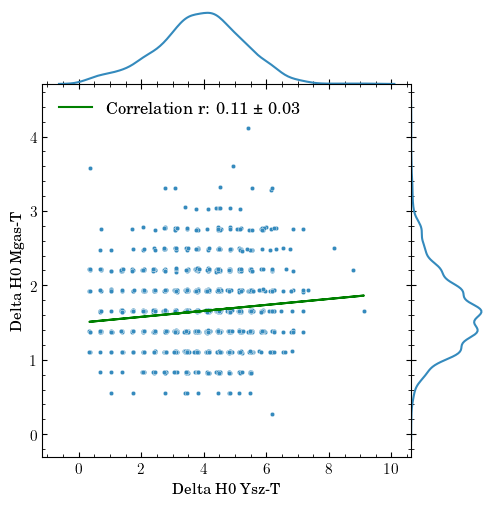

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress
import numpy as np

plt.style.use('nice.mplstyle')

# # Create a seaborn JointGrid with height 5x5 and space=0
# mask1 = data['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
# mask2 = data['Relations'] == '$M_\\mathrm{{gas}}-T$'
# x = np.array(data[mask1]['Delta_H0_scan'])
# y = np.array(data[mask2]['Delta_H0_scan'])
x = data_on_relations['Delta_H0_scan_rel1'].values
y = data_on_relations['Delta_H0_scan_rel2'].values


g = sns.JointGrid(x=x, y=y, height=5, space=0)

# Scatter plot with smaller points
g.plot_joint(sns.scatterplot, s=10)
g.plot_marginals(sns.kdeplot)

# Calculate Pearson correlation coefficient and its fitting error
corr, p_value = pearsonr(x, y)
n = len(x)
stderr = 1 / np.sqrt(n - 3)
corr_text = f'$r={corr:.2f}$'

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * np.array(x) + intercept
g.ax_joint.plot(x, line, color='green', label=corr_text)

# Remove upper ticks on marginal plots
g.ax_marg_x.tick_params(top=False, which='both')
g.ax_marg_y.tick_params(right=False, which='both')

# Set labels
g.set_axis_labels('Delta H0 Ysz-T', 
                  'Delta H0 Mgas-T')

# Add legend
g.ax_joint.legend(loc='upper left')
# plt.savefig(save_path, bbox_inches='tight')

plt.show()

## Plot

slope: 0.6801623174229984


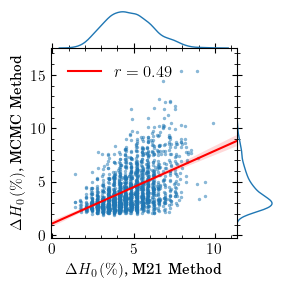

slope: 0.5087717213904073


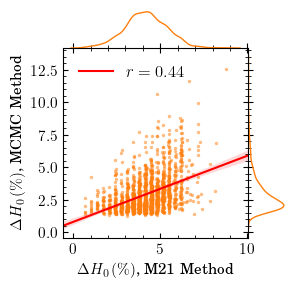

slope: 0.7902522316850469


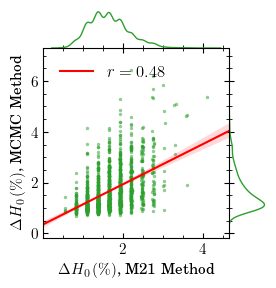

slope: 0.1388171888570705


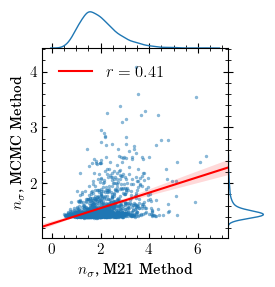

slope: 0.1103642262491094


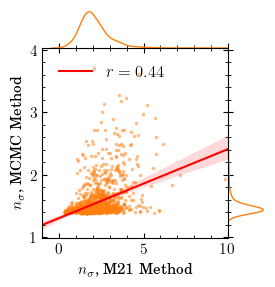

slope: 0.1548601148170676


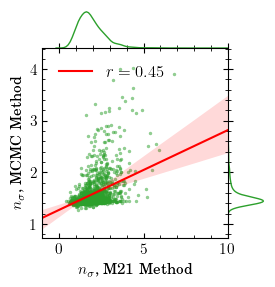

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress
import numpy as np
import pandas as pd
plt.style.use('nice.mplstyle')
def plot_correlation(data : pd.DataFrame,
                     relation : str, 
                     save_path : str, 
                     xlim : tuple=None,
                     ylim : tuple=None,
                     scatter_color : str='r', 
                     hist_color : str='gray',
                     xcolumn : str='Delta_H0_scan',
                     ycolumn : str='Delta_H0_mc',
                     xlabel : str='$\\Delta H_0\\,(\\%)$, M21 Method',
                     ylabel : str='$\\Delta H_0\\,(\\%)$, MCMC Method',
                     ):  # Added toggle for marginal plots

    # Filter data for the selected relation
    mask = data['Relations'] == relation
    x = data[mask][xcolumn]
    y = data[mask][ycolumn]

    # Create a seaborn JointGrid with marginal plots
    g = sns.JointGrid(data=data[mask], x=xcolumn, y=ycolumn, height=3, space=0)   # height sets the size of the main panel
    g.plot_joint(sns.scatterplot, color=scatter_color, s=5, alpha=0.5, edgecolor=None)
    # g.plot_joint(sns.kdeplot, color='grey', alpha=0.3, bw_adjust=2, levels=50, fill=True)
    g.plot_marginals(sns.kdeplot, color=hist_color)
    # g.plot_joint(sns.kdeplot, color=hist_color)

    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f'slope: {slope}')
    # line = slope * np.array(x) + intercept
    # g.ax_joint.plot(x, line, color='r', label=f'Correlation r: {r_value:.2f} ± {std_err:.2f}', linewidth=1)

    if xlim is not None:
        g.ax_joint.set_xlim(xlim)
    if ylim is not None:
        g.ax_joint.set_ylim(ylim)

    sns.regplot(data=data[mask], x=xcolumn, y=ycolumn, color='r', 
                label=f'$r = {r_value:.2f}$', ax=g.ax_joint, scatter=False, 
                truncate=False)

    # Set labels and legend
    g.set_axis_labels(xlabel, ylabel)
    g.ax_joint.legend(loc='upper left')

    # Remove upper ticks on marginal plots
    g.ax_marg_x.tick_params(top=False, which='both')
    g.ax_marg_y.tick_params(right=False, which='both')

    # plt.gca().set_aspect('equal', adjustable='datalim') # or box

    plt.savefig(save_path, dpi=200)
    plt.show()


# delta H0
plot_correlation(data, 
                 relation='$L_\\mathrm{{X}}-T$', 
                 save_path='./to_paper/LX-T_mc_scan_delta_H0.png', 
                 scatter_color='tab:blue', 
                 hist_color='tab:blue',
                 )
plot_correlation(data, 
                 relation='$Y_\\mathrm{{SZ}}-T$', 
                 save_path='./to_paper/YSZ-T_mc_scan_delta_H0.png', 
                 scatter_color='tab:orange', 
                 hist_color='tab:orange',
                 )
plot_correlation(data, 
                 relation='$M_\\mathrm{{gas}}-T$', 
                 save_path='./to_paper/M-T_mc_scan_delta_H0.png', 
                 scatter_color='tab:green', 
                 hist_color='tab:green',
                 )

# significance
plot_correlation(data, 
                 xcolumn='Significance_scan',
                 ycolumn='Significance_mc',
                 ylabel='$n_\\sigma$, MCMC Method',
                 xlabel='$n_\\sigma$, M21 Method',
                 relation='$L_\\mathrm{{X}}-T$', 
                 save_path='./to_paper/LX-T_mc_scan_significance.png', 
                 scatter_color='tab:blue', 
                 hist_color='tab:blue',
                 )
plot_correlation(data, 
                 xcolumn='Significance_scan',
                 ycolumn='Significance_mc',
                 ylabel='$n_\\sigma$, MCMC Method',
                 xlabel='$n_\\sigma$, M21 Method',
                 relation='$Y_\\mathrm{{SZ}}-T$', 
                 save_path='./to_paper/YSZ-T_mc_scan_significance.png', 
                 scatter_color='tab:orange', 
                 hist_color='tab:orange',
                 xlim=(-1, 10)
                 )
plot_correlation(data, 
                 xcolumn='Significance_scan',
                 ycolumn='Significance_mc',
                 ylabel='$n_\\sigma$, MCMC Method',
                 xlabel='$n_\\sigma$, M21 Method',
                 relation='$M_\\mathrm{{gas}}-T$', 
                 save_path='./to_paper/M-T_mc_scan_significance.png', 
                 scatter_color='tab:green', 
                 hist_color='tab:green',
                 xlim=(-1, 10)
                 )